In [1]:
# Load
import matplotlib.pyplot as plt
import pandas as pd

raw_ohlcv = pd.read_csv("./data/ohlcv.csv", index_col=0, low_memory=False)

multi_ohlcv = raw_ohlcv.copy()

_stock_code = raw_ohlcv["stock_code"].sample(1).iloc[0]
single_ohlcv = raw_ohlcv[raw_ohlcv["stock_code"] == _stock_code].copy()
single_ohlcv.index = pd.to_datetime(single_ohlcv.index)

In [2]:
prices = single_ohlcv["close"]

In [3]:
from ta_tools.models.moving_average import SimpleMovingAverageModel
from ta_tools.visualizers.moving_average import MovingAverageVisualizer

In [4]:
MA_CFG = {
    "short_window": 20,
    "long_window": 80,
}

sma_model = SimpleMovingAverageModel(prices, MA_CFG)
ma_indicator = sma_model.indicator()
ma_signal = sma_model.signal(ma_indicator, continious=True, trend=False)
ma_signal

,price,short_ma,long_ma,signal
date,,,,
2019-01-21,2060,NaN,NaN,NaN
2019-01-22,1995,NaN,NaN,NaN
2019-01-23,2035,NaN,NaN,NaN
2019-01-24,2020,NaN,NaN,NaN
2019-01-25,2020,NaN,NaN,NaN
...,...,...,...,...
2024-01-11,1896,1858.45,1984.1875,0.367600
2024-01-12,1916,1862.00,1981.6375,0.349766
2024-01-15,1916,1866.95,1977.7750,0.324002


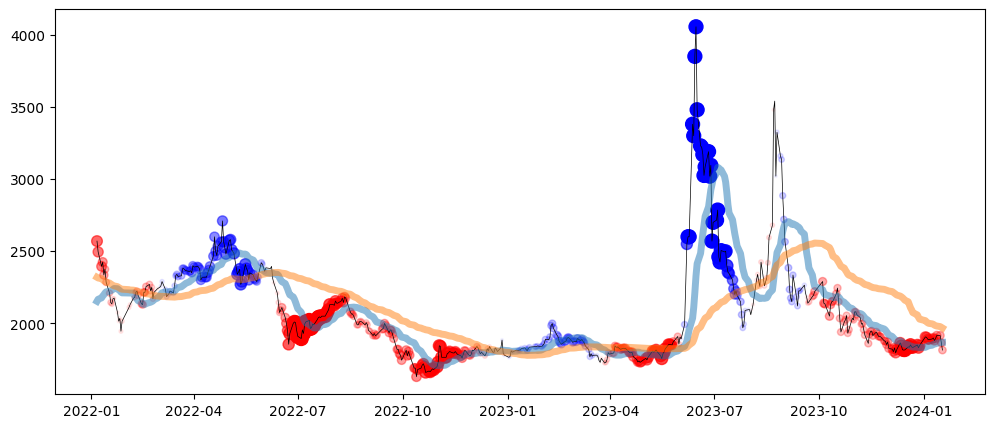

In [5]:
ma_visualizer = MovingAverageVisualizer()

recent_n = ma_signal.tail(500)

fig = plt.figure(figsize=(12, 5))
fig = ma_visualizer.draw_price(fig, recent_n)
fig = ma_visualizer.draw_ma(fig, recent_n)
fig = ma_visualizer.draw_signal(fig, recent_n)